In [9]:
import os 
import time
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm  

%matplotlib inline



In [10]:
# Adjust Plot size
fig_size = plt.rcParams["figure.figsize"] # get current plot size
print("Default plot size:", fig_size) # # print current plot size
fig_size[0] = 15 # set x value of plot size 
fig_size[1] = 10  # set y value of plot size 
plt.rcParams["figure.figsize"] = fig_size # set new plot size
print("New plot size:", fig_size) # # print current plot size

Default plot size: [6.0, 4.0]
New plot size: [15, 10]


In [11]:
# load cleaned data set

# load dataframe
data = pd.read_pickle(path="../data/interim/01_coffee.pkl")


# Load coffee types dictionary 
type_dict = np.load('../data/interim/cfe_Type_dict.npy').item()
type_dict

{'Jacobs Classic': 0,
 'Krüger Chai latte Classic India': 4,
 'Krüger Chai latte Honig': 3,
 'Krüger Chai latte Ingwer-Zitronengras': 2,
 'Krüger Chai latte Sweet India': 5,
 'San Fabio Ungesüsst': 1}

In [12]:
# Verify meta data to ensure correct data set

### from 01_GetTheData ###
###    Features(3): ['Date', 'Type', 'Weekday']
###    Rows: 231 entries
###    Time span of observations: from 2016-03-21 09:23:00 to 2016-11-11 14:44:42
###    Types of coffee: 6


features = data.columns.tolist()
instances = data.index.size 
timeSpan = [data.Date.min(), data.Date.max()]
types_amount = len(data.Type.unique())

print("Features({0}): {1}".format(len(features),features))
print("Rows: {0} entries".format(instances))
print("Time span of observations: from {0} to {1}".format(timeSpan[0], timeSpan[1]))
print("Types of coffee: {0}".format(types_amount))

Features(3): ['Date', 'Type', 'Weekday']
Rows: 231 entries
Time span of observations: from 2016-03-21 09:23:00 to 2016-11-11 14:44:42
Types of coffee: 6


Values:
2    58
3    50
4    48
0    43
1    32
Name: Weekday, dtype: int64


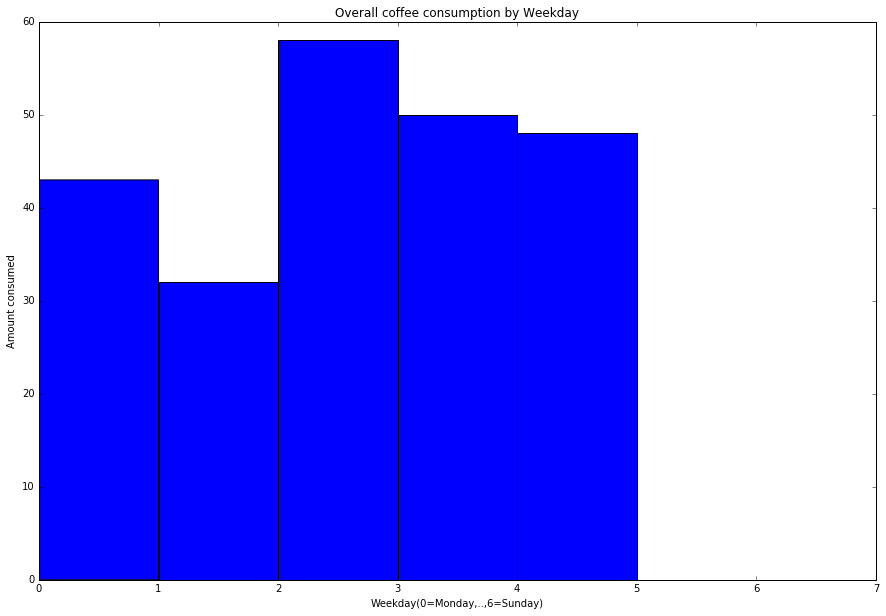

In [32]:
# draw historgramm amount by weekday
print("Values:\n{0}".format(data.Weekday.value_counts()))
plt.hist(x=data.Weekday, bins=[0,1,2,3,4,5,6,7])
plt.title('Overall coffee consumption by Weekday')
plt.ylabel('Amount consumed')
plt.xlabel('Weekday(0=Monday,..,6=Sunday)')


Average consumption per day:  2.15887850467
Standard deviation in consumption:  0.802702190015


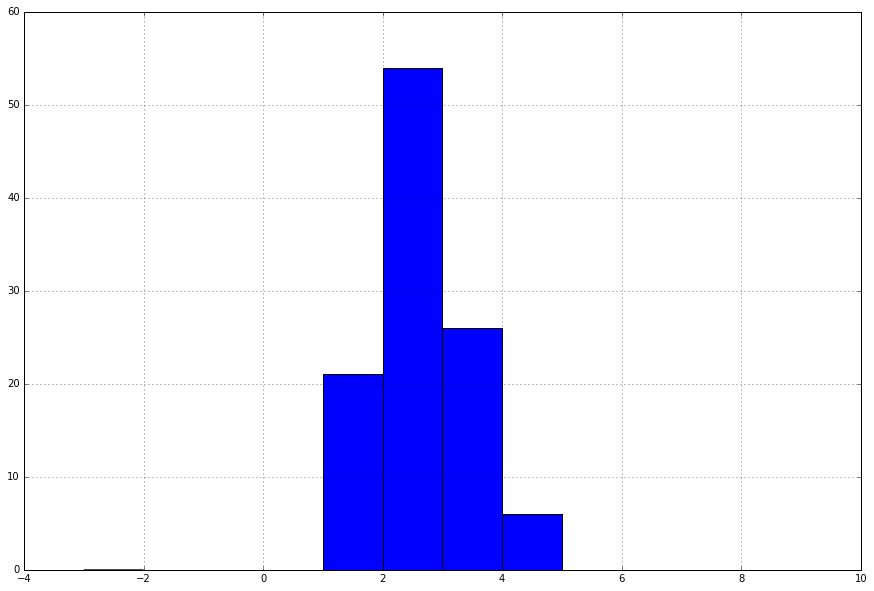

In [81]:
# group and display per day consumption
perDayConsumption = data.Date.dt.date.value_counts()
perDayConsumption = perDayConsumption.sort_index()
perDayConsumption.hist(bins=[-3,-2,-1,0,1,2,3,4,5,6,7,8,9])

print("Average consumption per day: ",perDayConsumption.mean())
print("Standard deviation in consumption: ",perDayConsumption.std())
